## Table of Contents (Task 4.10, part 2)
## Import Library and Dataframe

## 5. Create Customers profile and Department


## 6. Visualization Distribution of profiles

## 7. Customer_Profile of Frequency and Expenditure

## 8. Compare Customer profile with regions and departments

## 9. Export Dataframe

##  import Libraries and Datafame

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import path of dataframe
path = r"C:\Users\bhimc\Documents\Instacart Basket Analysis (Career Foundry Rekha)"

In [3]:
insta_grocery = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','profiling_final.pkl'))

## 5 Customers profile and Department

### Connecting Department with customer profile

In [5]:
top_departments = (insta_grocery.groupby('customer_profile')['department_id']
                    .apply(lambda x: x.value_counts().nlargest(5).index.tolist())
                    .reset_index(name='top_department_ids'))

In [6]:
# Top ddepartments result to clipboard for Excel. 
top_departments.to_clipboard()

In [7]:
# create a crosstab and store it in crosstab object

crosstab = pd.crosstab(insta_grocery['department_id'], insta_grocery['customer_profile'], dropna = False,margins=False)
#crosstab

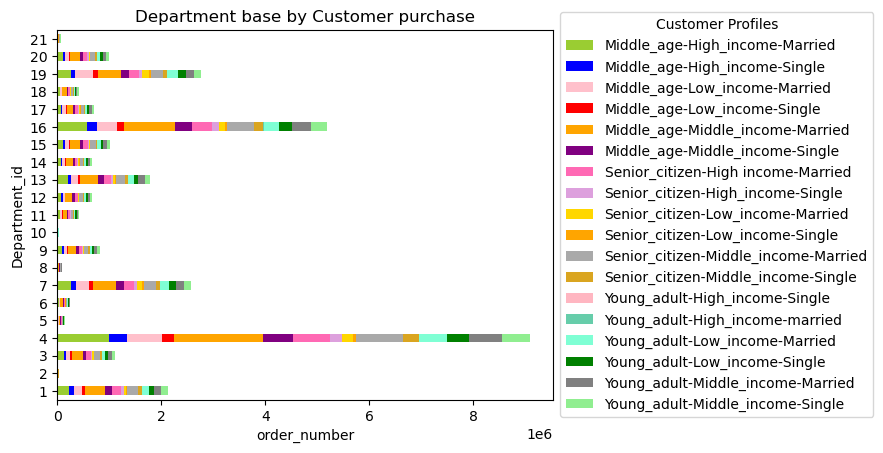

In [8]:
colors=['yellowgreen', 'blue', 'pink', 'red', 'orange', 'purple', 'hotpink', 'plum', 'gold', 'orange', 'darkgray', 'goldenrod', 'lightpink', 'mediumaquamarine','aquamarine', 'green', 'gray', 'lightgreen']
customer_profile_depts = crosstab.plot.barh(stacked=True,color=colors)

# Add labels and a title 

customer_profile_depts.set(xlabel='order_number', ylabel='Department_id', title='Department base by Customer purchase')
customer_profile_depts.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save stacked horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_deptpurchase_stackedbarplot.png'),bbox_inches='tight')


## 6. Visualization Distribution of profiles

### Create an appropriate visualization to show the distribution of profiles.

## Visualization of customer profile in pie chart bar chart

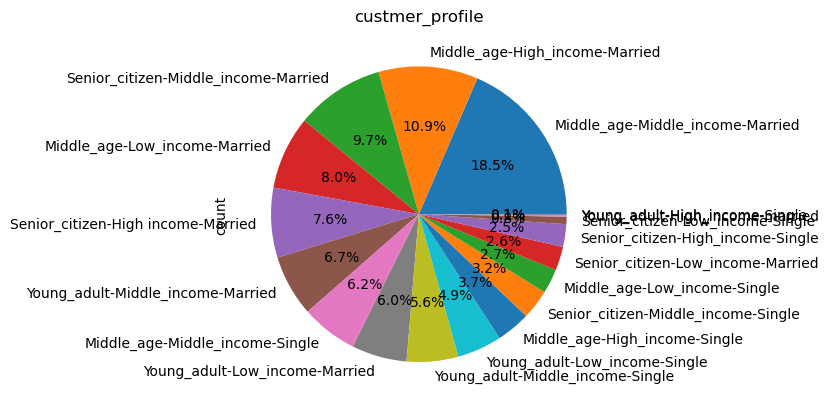

In [6]:
# pie chart - 'Share of marital status'
top_department = insta_grocery['customer_profile'].value_counts().plot.pie(autopct='%1.1f%%', title='custmer_profile')

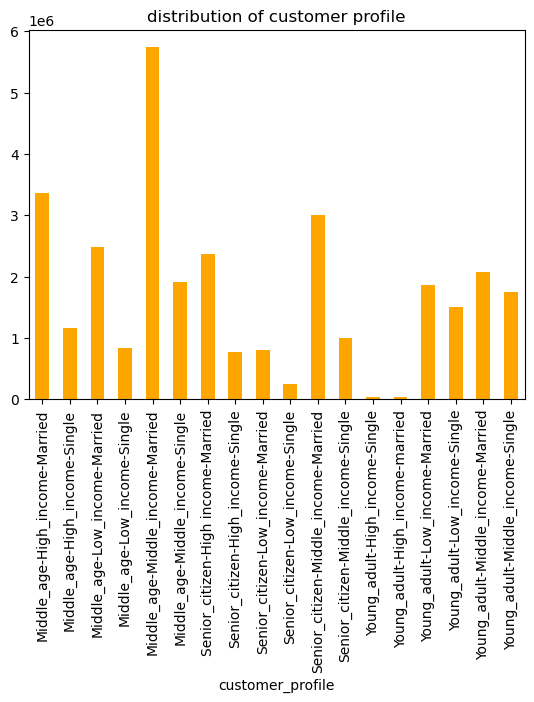

In [8]:
plt.title('distribution of customer profile')
bar_profile=insta_grocery['customer_profile'].value_counts().sort_index().plot.bar(color='orange')

In [9]:
bar_profile.figure.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_profile.png'))

In [10]:
# Exporting pie 
top_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_customer_profile_.png'))

##   Distribution by Income

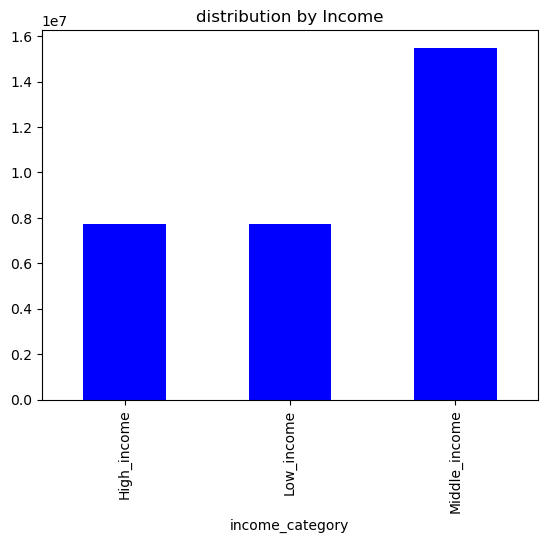

In [12]:
plt.title('distribution by Income')
bar_income_distribution=insta_grocery['income_category'].value_counts().sort_index().plot.bar(color= 'blue')
bar_income_distribution.figure.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_income_distribution.png'))

## Distribution by Age

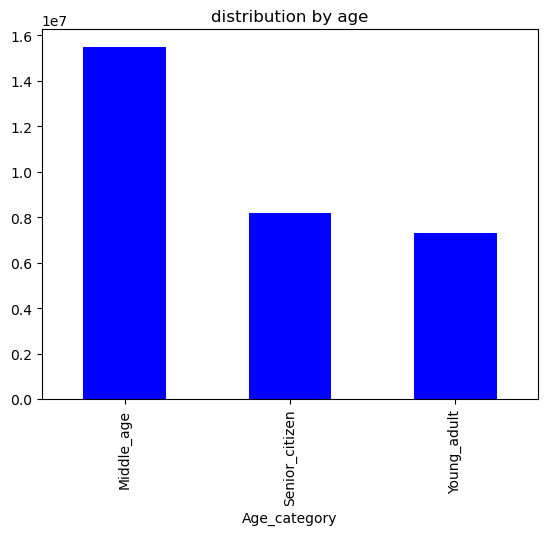

In [14]:
plt.title('distribution by age')
bar_age_distribution=insta_grocery['Age_category'].value_counts().sort_index().plot.bar(color='blue')
bar_age_distribution.figure.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_age_distribution.png'))

#### The customers who are middle age, mid-income, and married have largest number. 
   ** Largest Number of customer by profile
   1) Middle ages, Mid-incom, Married  
    2) Middle ages, High-income, Married
    3) Senior_citizen, Mid-income, Married
    
     ** Lowest Number of customer by profile
  1) Yong, High-income, Single
  2) Young, High-income, Married
  3) Senior_citizen, Low-income,Single

## Create a chart for customer dependants distribution

Text(0, 0.5, 'No. of counts')

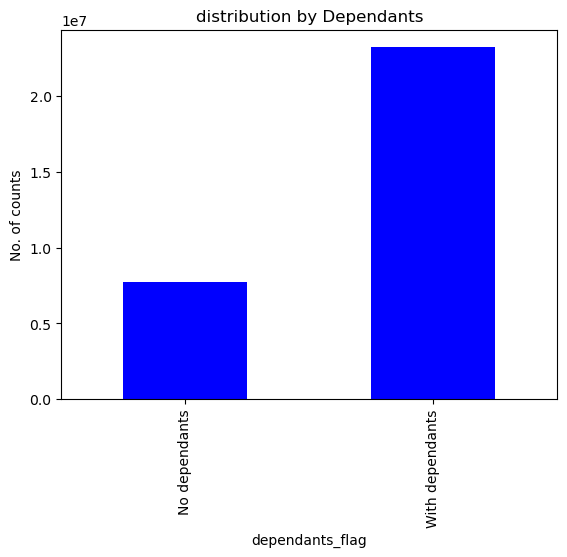

In [91]:
plt.title('distribution by Dependants')
bar_depandents_distribution=insta_grocery['dependants_flag'].value_counts().sort_index().plot.bar(color='blue')
bar_age_distribution.figure.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_dependents_distribution.png'))
plt.ylabel('No. of counts')

## 7. Customer_Profile of Frequency and Expenditure

### "Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure"

In [23]:
frequency_profile=insta_grocery.groupby('customer_profile').agg({'order_hour_of_day':['mean', 'min', 'max']})

In [24]:
frequency_profile

order_hour_of_day        
                                                  mean min max
customer_profile                                              
Middle_age-High_income-Married               13.462361   0  23
Middle_age-High_income-Single                13.451530   0  23
Middle_age-Low_income-Married                13.319423   0  23
Middle_age-Low_income-Single                 13.279436   0  23
Middle_age-Middle_income-Married             13.435273   0  23
Middle_age-Middle_income-Single              13.460036   0  23
Senior_citizen-High income-Married           13.427003   0  23
Senior_citizen-High_income-Single            13.484907   0  23
Senior_citizen-Low_income-Married            13.235746   0  23
Senior_citizen-Low_income-Single             13.235513   0  23
Senior_citizen-Middle_income-Married         13.441027   0  23
Senior_citizen-Middle_income-Single          13.425575   0  23
Young_adult-High_income-Single               13.371351   0  23
Young_adult-High_income-married              13.521429   0  23
Young_adult-Low_income-Married               13.333433   0  23
Young_adult-Low_income-Single                13.365560   0  23
Young_adult-Middle_income-Married            13.412026   0  23
Young_adult-Middle_income-Single             13.454270   0  23

## Create a chart for Order_hour_of_day 

In [88]:
# create a crosstab and store it in crosstab object
crosstab6 = pd.crosstab(insta_grocery['order_hour_of_day'], insta_grocery['customer_profile'], dropna = False,margins=False)

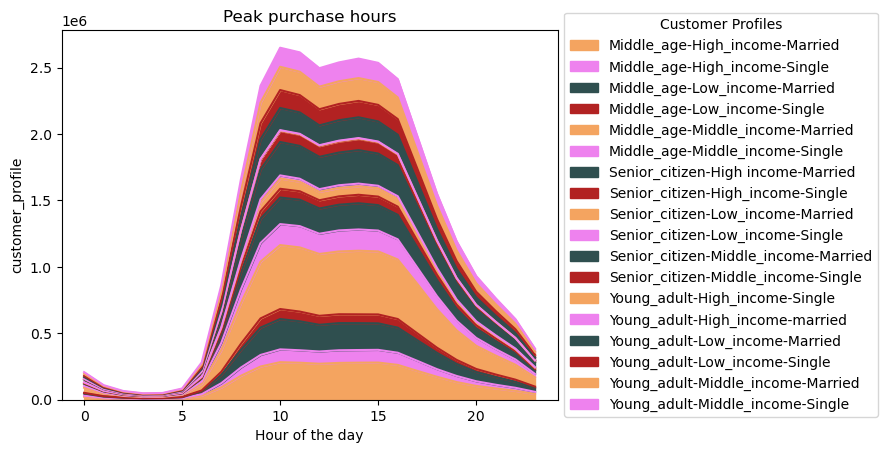

In [89]:
customer_profile_ohd = crosstab6.plot.area(color=colors)

# Add labels and a title and put titled legend next to chart

customer_profile_ohd.set(xlabel='Hour of the day', ylabel='customer_profile', title='Peak purchase hours')
customer_profile_ohd.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save area chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_hourofday_areaplot.png'),bbox_inches='tight')

In [25]:
expend_profile=insta_grocery.groupby('customer_profile').agg({'prices':['sum', 'mean', 'min', 'max']})

In [26]:
expend_profile

prices                          
                                              sum        mean  min      max
customer_profile                                                           
Middle_age-High_income-Married        69437912.00   20.623522  1.0  99999.0
Middle_age-High_income-Single         22550944.00   19.529428  1.0  99999.0
Middle_age-Low_income-Married         17838560.00    7.198407  1.0  14900.0
Middle_age-Low_income-Single           5974564.50    7.194630  1.0  14900.0
Middle_age-Middle_income-Married      51170048.00    8.917959  1.0  99999.0
Middle_age-Middle_income-Single       18313420.00    9.558995  1.0  99999.0
Senior_citizen-High income-Married    40406268.00   17.071100  1.0  99999.0
Senior_citizen-High_income-Single     13756895.00   17.852257  1.0  99999.0
Senior_citizen-Low_income-Married      5388175.00    6.708251  1.0     25.0
Senior_citizen-Low_income-Single       1686413.75    6.721591  1.0     25.0
Senior_citizen-Middle_income-Married  26285988.00    8.751989  1.0  99999.0
Senior_citizen-Middle_income-Single    8837572.00    8.833456  1.0  99999.0
Young_adult-High_income-Single        10784014.00  292.566833  1.0  99999.0
Young_adult-High_income-married       13221052.00  292.371796  1.0  99999.0
Young_adult-Low_income-Married        14205177.00    7.615218  1.0  14900.0
Young_adult-Low_income-Single         11494176.00    7.597039  1.0     25.0
Young_adult-Middle_income-Married     21762188.00   10.479625  1.0  99999.0
Young_adult-Middle_income-Single      16402918.00    9.383353  1.0  99999.0

## 8. Compare Customer profile with regions and departments
### "Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

## Create a bart chart for customer profile frequency representing

In [12]:
insta_grocery['customer_profile'].value_counts(dropna=False)

customer_profile
Middle_age-Middle_income-Married        5737865
Middle_age-High_income-Married          3366928
Senior_citizen-Middle_income-Married    3003430
Middle_age-Low_income-Married           2478126
Senior_citizen-High income-Married      2366940
Young_adult-Middle_income-Married       2076619
Middle_age-Middle_income-Single         1915831
Young_adult-Low_income-Married          1865367
Young_adult-Middle_income-Single        1748087
Young_adult-Low_income-Single           1512981
Middle_age-High_income-Single           1154716
Senior_citizen-Middle_income-Single     1000466
Middle_age-Low_income-Single             830420
Senior_citizen-Low_income-Married        803216
Senior_citizen-High_income-Single        770597
Senior_citizen-Low_income-Single         250895
Young_adult-High_income-married           45220
Young_adult-High_income-Single            36860
Name: count, dtype: int64

In [17]:
customer_profile_data ={
'Middle_age-Middle_income-Married' : 5737865,
'Middle_age-High_income-Married' : 3366928,
'Senior_citizen-Middle_income-Married' : 3003430,
'Middle_age-Low_income-Married' : 2478126,
'Senior_citizen-High income-Married' : 2366940,
'Young_adult-Middle_income-Married' : 2076619,
'Middle_age-Middle_income-Single' : 1915831,
'Young_adult-Low_income-Married' : 1865367,
'Young_adult-Middle_income-Single' : 1748087,
'Young_adult-Low_income-Single' : 1512981,
'Middle_age-High_income-Single' : 1154716,
'Senior_citizen-Middle_income-Single' : 1000466,
'Middle_age-Low_income-Single' : 830420,
'Senior_citizen-Low_income-Married' : 803216,
'Senior_citizen-High_income-Single' : 770597,
'Senior_citizen-Low_income-Single' : 250895,
'Young_adult-High_income-married' : 45220,
'Young_adult-High_income-Single' : 36860}
customer_category = list(customer_profile_data.keys())
customercategory_count = list(customer_profile_data.values())

In [18]:
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

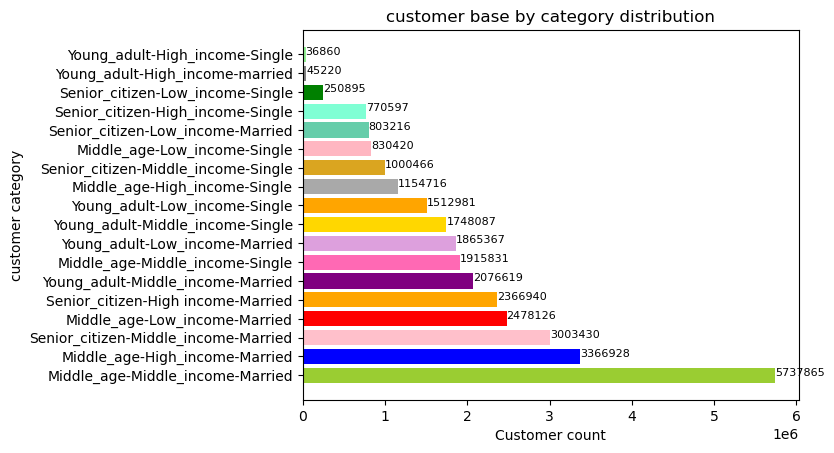

In [29]:
clrs=['yellowgreen', 'blue', 'pink', 'red', 'orange', 'purple', 'hotpink', 'plum', 'gold', 'orange', 'darkgray', 'goldenrod', 'lightpink', 'mediumaquamarine','aquamarine', 'green', 'gray', 'lightgreen']
plt.barh(customer_category,customercategory_count,height=0.8,color=clrs)
for index,value in enumerate(customercategory_count):
    plt.text(value,index, str(value),size=8)
    
# X axis label
plt.xlabel('Customer count')

# Y axis label
plt.ylabel('customer category')

# chart title
plt.title('customer base by category distribution')

# save Horizondal barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_category_hbarplot.png'),bbox_inches='tight')

In [28]:
region_profile=insta_grocery[['region', 'Age_category', 'income_category', 'Family_category','customer_profile']]

In [46]:
region_profile

,region,Age_category,income_category,Family_category,customer_profile
0,South,Young_adult,Low_income,Married,Young_adult-Low_income-Married
1,South,Young_adult,Low_income,Married,Young_adult-Low_income-Married
2,South,Young_adult,Low_income,Married,Young_adult-Low_income-Married
3,South,Young_adult,Low_income,Married,Young_adult-Low_income-Married
4,South,Young_adult,Low_income,Married,Young_adult-Low_income-Married
...,...,...,...,...,...
32404850,West,Young_adult,Low_income,Single,Young_adult-Low_income-Single
32404851,West,Young_adult,Low_income,Single,Young_adult-Low_income-Single
32404852,West,Young_adult,Low_income,Single,Young_adult-Low_income-Single
32404853,West,Young_adult,Low_income,Single,Young_adult-Low_income-Single


## Create a Bar Chart for Region frequency

In [47]:
insta_grocery['region'].value_counts(dropna=False)

region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

In [48]:
region_data={
    'Northeast':5464685,
    'Midwest':7261513,
    'West':7927227,
    'South':10311139   
}

region_category=list(region_data.keys())
regioncustomer_count=list(region_data.values())

In [49]:
#size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

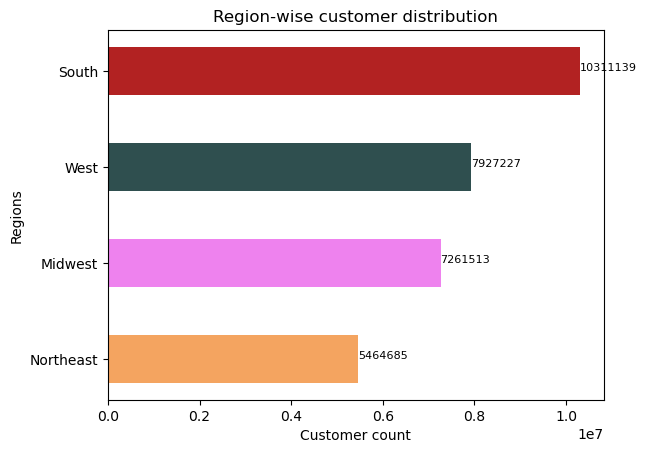

In [58]:
plt.barh(dept_category,dept_count,height=0.8,color=clrs)
for index,value in enumerate(dept_count):
    plt.text(value,index, str(value),size=8)
    
# X axis label
plt.xlabel('Count')

# Y axis label
plt.ylabel('Department')

# chart title
plt.title('Most Popular Department base on the Cusromers')

# save Horizondal barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_region_hbarplot.png'),bbox_inches='tight')

In [112]:
plt.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_distribution.png'))

<Figure size 640x480 with 0 Axes>

### Popular department base on customers

In [62]:
insta_grocery['department_id'].value_counts(dropna=False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [79]:
depts= {
  '10':33451, 
    '2':34411,
    '8':93060,
    '5':144627,
    '6':255991,
    '18':410392,
    '11':424306,
    '14':670850,
    '12':674781,
    '17':966857,
    '9':822136,
    '20':1003834,
    '15':1012074,
    '3':670850,
    '13':1782705,
    '1':2121731,
    '7':2571901,
    '19':2766406,
    '16':5177182,
    '4':9079273, }
dept_category=list(depts.keys())
dept_count=list(depts.values())

In [64]:
# setting the size of the bar chart
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

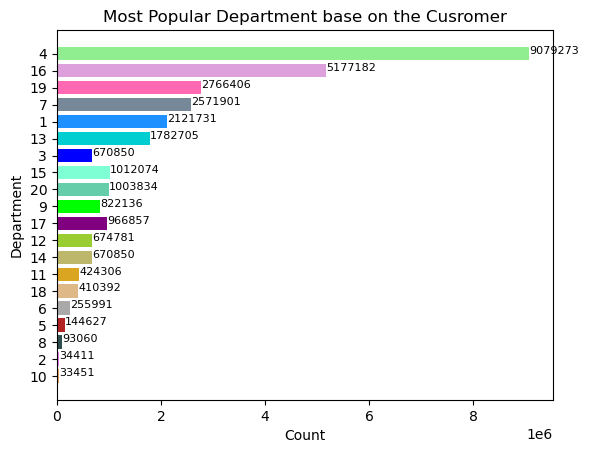

In [82]:
plt.barh(dept_category,dept_count,height=0.8,color=clrs)
for index,value in enumerate(dept_count):
    plt.text(value,index, str(value),size=8)
    
# X axis label
plt.xlabel('Count')

# Y axis label
plt.ylabel('Department')

# chart title
plt.title('Most Popular Department base on the Cusromers')

# save Horizondal barchart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_region_hbarplot.png'),bbox_inches='tight')

## "Create a “loyalty_flag” column." 
#### creating a loyalty flag for existing customers using the transform() and loc() functions

In [36]:
# Split the data into groups based on the “user_id” column.
#Apply the transform() function on the “order_number” column to generate the maximum orders for each user.
#Create a new column, “max_order,” into which you’ll place the results of your aggregation.
insta_grocery['max_order'] = insta_grocery.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\bhimc\AppData\Local\Temp\ipykernel_15100\341174607.py:4: FutureWarning: The provided callable <function amax at 0x00000234EFA11BC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  insta_grocery['max_order'] = insta_grocery.groupby(['user_id'])['order_number'].transform(np.max)


In [37]:
insta_grocery.loc[insta_grocery['max_order'] >40, 'loyalty_flag'] = 'Loyal customer'

In [38]:
insta_grocery.loc[(insta_grocery['max_order'] <=40) & (insta_grocery['max_order'] >10), 'loyalty_flag'] = 'Regular customer'

In [39]:
insta_grocery.loc[insta_grocery['max_order'] <=10, 'loyalty_flag'] = 'New customer'

In [41]:
# Check the Frequency of new "loyalty_flag" using Value_counts() Function
insta_grocery['loyalty_flag']. value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

## Customer ordering habit
###  customer profile  base on loyalty

In [42]:
# create a crosstab and store it in crosstab object

crtab = pd.crosstab(insta_grocery['loyalty_flag'], insta_grocery['customer_profile'], dropna = False,margins=False)
#crosstab

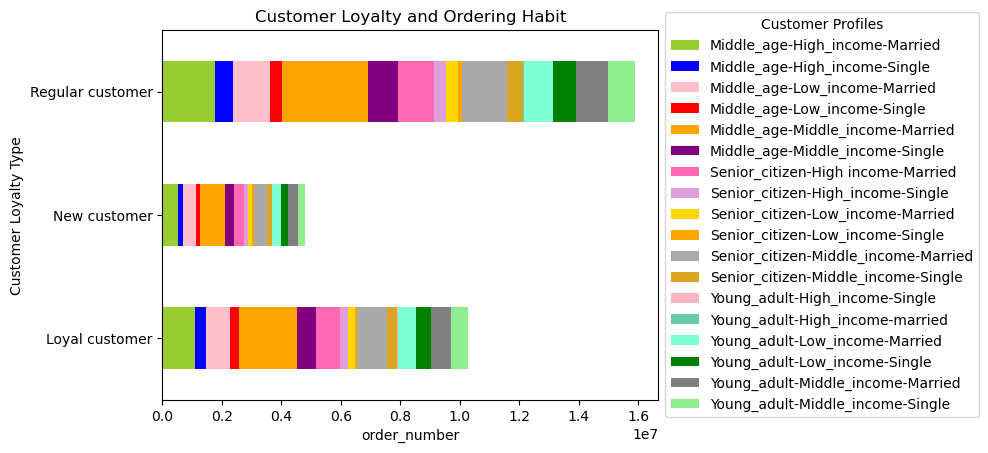

In [43]:
colors= ['yellowgreen', 'blue', 'pink', 'red', 'orange', 'purple', 'hotpink', 'plum', 'gold', 'orange', 'darkgray', 'goldenrod', 'lightpink', 'mediumaquamarine','aquamarine', 'green', 'gray', 'lightgreen']
customer_profile_loyalty = crtab.plot.barh(stacked=True,color=colors)
# Add lables and title
customer_profile_loyalty.set(xlabel='order_number', ylabel='Customer Loyalty Type', title='Customer Loyalty and Ordering Habit')
customer_profile_loyalty.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')
# save stacked horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_loyaltyordrs_stackedbarplot.png'),bbox_inches='tight')

## Price base on Customer profiles

In [44]:
# create a crosstab and store it in crosstab object

crtab1 = pd.crosstab(insta_grocery['price_range_loc'], insta_grocery['customer_profile'], dropna = False,margins=False)
#crosstab

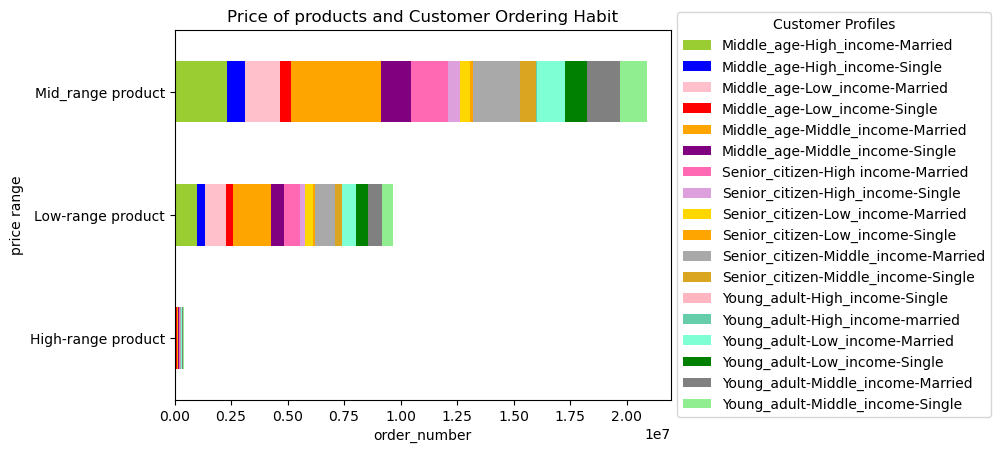

In [48]:
colors= ['yellowgreen', 'blue', 'pink', 'red', 'orange', 'purple', 'hotpink', 'plum', 'gold', 'orange', 'darkgray', 'goldenrod', 'lightpink', 'mediumaquamarine','aquamarine', 'green', 'gray', 'lightgreen']
customer_profile_prices = crtab1.plot.barh(stacked=True,color=colors)

# Add lables and title
customer_profile_prices.set(xlabel='order_number', ylabel='price range', title='Price of products and Customer Ordering Habit')
customer_profile_prices.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')

# save stacked horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_prices_stackedbarplot.png'),bbox_inches='tight')

## Customer Profile base on the Spending

In [96]:
# create a crosstab and store it in crosstab object

crtab = pd.crosstab(insta_grocery['spending_flag'], insta_grocery['customer_profile'], dropna = False, margins=False)

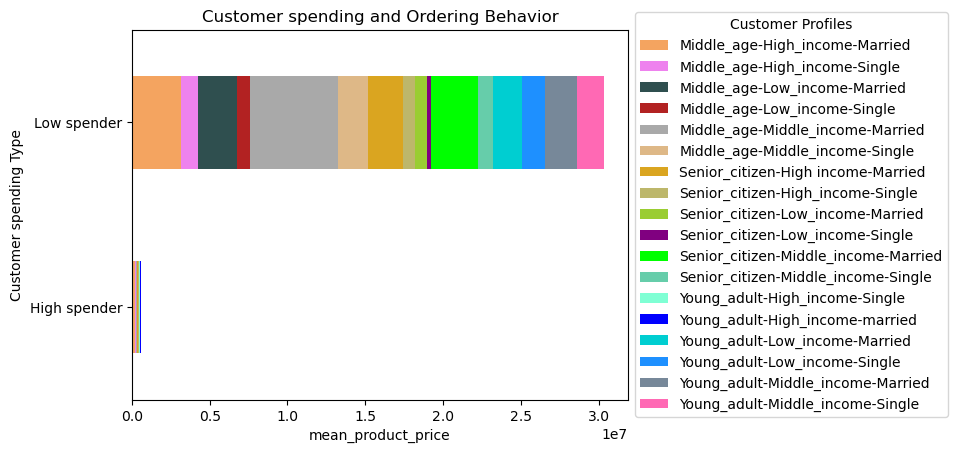

In [106]:
customer_profile = crtab.plot.barh(stacked=True,color=colors)
colors=['sandybrown','violet','darkslategray','firebrick','darkgrey','burlywood','goldenrod','darkkhaki','yellowgreen','purple','lime','mediumaquamarine','aquamarine','blue','darkturquoise','dodgerblue','lightslategrey','hotpink','plum','lightgreen','lawngreen','gold','orange']
# Add labels and a title and put titled legend next to chart

customer_profile.set(xlabel='mean_product_price', ylabel='Customer spending Type', title='Customer spending and Ordering Behavior')
customer_profile.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Customer Profiles')
# save stacked horizondal bar chart as png file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10-Customer_spendingordrs_stackedbarplot.png'),bbox_inches='tight')

## 9. Export Dataframe

In [ ]:
insta_grocery.to_pickle(os.path.join(path,'02 Data','Prepared Data','profiling_final.pkl'))